# Classical regression models

* KNN
* Kernel SVM
* Random Forest

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from training.creating_dataset import load_and_preprocess_data
from training.constants import FEATURES, DATASET_FILES, ORDERED_CHARACTERISTICS_FULL


bestiaries = load_and_preprocess_data(
    [f"../../pathfinder_2e_remaster_data/{f}" for f in DATASET_FILES], FEATURES
)

columns = [col for col in bestiaries.columns if col not in ["book", "level"]]
scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[columns] = pd.DataFrame(
    scaler.fit_transform(bestiaries[columns]), index=bestiaries.index
)
min_max_df["book"] = bestiaries["book"]
min_max_df["level"] = bestiaries["level"]
bestiaries = min_max_df
bestiaries = bestiaries[ORDERED_CHARACTERISTICS_FULL + ["book", "level"]]
bestiaries.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness,book,level
0,0.588235,0.588235,0.357143,0.200000,0.470588,0.529412,0.509434,0.252087,0.156522,0.425532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8
1,0.588235,0.411765,0.428571,0.600000,0.411765,0.411765,0.396226,0.123539,0.130435,0.297872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,5
2,0.529412,0.470588,0.214286,0.400000,0.470588,0.352941,0.320755,0.078464,0.069565,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,3
3,0.352941,0.529412,0.214286,0.333333,0.470588,0.352941,0.358491,0.048414,0.104348,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,3
4,0.588235,0.588235,0.500000,0.466667,0.529412,0.588235,0.490566,0.198664,0.156522,0.361702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8


In [2]:
import os
from training.splitting_dataset import split_dataframe, get_date_books_mapping

os.chdir("../../training")
books_dates_map = get_date_books_mapping()

books_to_include = [
    book for _, row in books_dates_map["books"].iteritems() for book in row
]
bestiaries = bestiaries[bestiaries["book"].isin(books_to_include)]
X_train, X_test, y_train, y_test = split_dataframe(bestiaries)
os.chdir("../notebooks/models")

In [5]:
X_test

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,poison_resistance,slashing_resistance,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness
651,0.588235,0.470588,0.428571,0.000000,0.411765,0.176471,0.452830,0.148581,0.104348,0.340426,...,0.000000,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
652,0.000000,0.705882,0.357143,0.666667,0.588235,0.705882,0.547170,0.290484,0.191304,0.382979,...,0.000000,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
656,0.411765,0.588235,0.285714,0.400000,0.411765,0.588235,0.396226,0.081803,0.095652,0.191489,...,0.000000,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
657,0.588235,0.647059,0.428571,0.533333,0.411765,0.529412,0.490566,0.207012,0.139130,0.340426,...,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
659,0.647059,0.470588,0.428571,0.466667,0.647059,0.588235,0.490566,0.273790,0.156522,0.297872,...,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,0.823529,0.647059,0.571429,0.666667,0.764706,0.647059,0.773585,0.632721,0.260870,0.595745,...,0.000000,0.00,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0
1477,0.647059,0.352941,0.571429,0.466667,0.470588,0.411765,0.490566,0.228715,0.139130,0.382979,...,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1478,0.823529,0.588235,0.571429,0.200000,0.588235,0.529412,0.754717,0.632721,0.278261,0.680851,...,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1479,0.000000,0.470588,0.285714,0.666667,0.411765,0.529412,0.509434,0.248748,0.165217,0.404255,...,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


## KNeighbors

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


clf = KNeighborsRegressor()

hyper_params = {
    "leaf_size": list(range(50, 100, 10)),
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "manhattan", "euclidean"],
    "n_neighbors": list(range(1, 51)),
}

model = GridSearchCV(
    estimator=clf,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [50, 60, 70, 80, 90],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [4]:
model.best_params_

{'leaf_size': 50,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

1.2435195397196206
2.817641490858506


In [6]:
y_pred = model.predict(X_train)

print(mean_absolute_error(y_train, y_pred))
print(mean_squared_error(y_train, y_pred))

0.0
0.0


## SVM kernel=rbf

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


svm = SVR(kernel="rbf", max_iter=10000)
hyper_params = {"C": [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]}

model = GridSearchCV(
    estimator=svm,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVR(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0,
                               10000.0, 100000.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [8]:
model.best_params_

{'C': 10.0}

In [9]:
svm = SVR(kernel="rbf", max_iter=10000)
hyper_params = {"C": np.linspace(1, 100, num=100)}

model = GridSearchCV(
    estimator=svm,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=SVR(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [10]:
model.best_params_

{'C': 7.0}

In [11]:
svm = SVR(kernel="rbf", max_iter=10000)
hyper_params = {"C": np.linspace(1, 10, num=100)}

model = GridSearchCV(
    estimator=svm,
    param_grid=hyper_params,
    scoring="neg_absolute_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=SVR(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363...
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [12]:
model.best_params_

{'C': 6.363636363636364}

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

0.5594337917196204

In [14]:
mean_squared_error(y_test, y_pred)

1.0202996727869298

In [15]:
y_pred = model.predict(X_train)

print(mean_absolute_error(y_train, y_pred))
print(mean_squared_error(y_train, y_pred))

0.19529077488239519
0.09230465868082151


## Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from training.constants import RANDOM_STATE


rf = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)
hyper_params = {
    "max_features": [0.3],
    "n_estimators": [100, 200, 500],
    "criterion": ["squared_error", "absolute_error", "friedman_mse"],
}
model = GridSearchCV(
    estimator=rf,
    param_grid=hyper_params,
    scoring="neg_mean_absolute_error",
    cv=5,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_features': [0.3],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [11]:
model.best_params_

{'criterion': 'friedman_mse', 'max_features': 0.3, 'n_estimators': 500}

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

0.4382647058823529

In [13]:
mean_squared_error(y_test, y_pred)

0.5010076176470588

In [14]:
y_pred = model.predict(X_train)

print(mean_absolute_error(y_train, y_pred))
print(mean_squared_error(y_train, y_pred))

0.07843593519882176
0.01602683946980854


## All models

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from training.creating_dataset import load_and_preprocess_data
from training.constants import FEATURES, DATASET_FILES, ORDERED_CHARACTERISTICS_FULL


bestiaries = load_and_preprocess_data(
    [f"../../pathfinder_2e_remaster_data/{f}" for f in DATASET_FILES], FEATURES
)

In [2]:
columns = [col for col in bestiaries.columns if col not in ["book", "level"]]
scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[columns] = pd.DataFrame(
    scaler.fit_transform(bestiaries[columns]), index=bestiaries.index
)
min_max_df["book"] = bestiaries["book"]
min_max_df["level"] = bestiaries["level"]
bestiaries = min_max_df
bestiaries = bestiaries[ORDERED_CHARACTERISTICS_FULL + ["book", "level"]]
bestiaries.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness,book,level
0,0.588235,0.588235,0.357143,0.200000,0.470588,0.529412,0.509434,0.252087,0.156522,0.425532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8
1,0.588235,0.411765,0.428571,0.600000,0.411765,0.411765,0.396226,0.123539,0.130435,0.297872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,5
2,0.529412,0.470588,0.214286,0.400000,0.470588,0.352941,0.320755,0.078464,0.069565,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,3
3,0.352941,0.529412,0.214286,0.333333,0.470588,0.352941,0.358491,0.048414,0.104348,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,3
4,0.588235,0.588235,0.500000,0.466667,0.529412,0.588235,0.490566,0.198664,0.156522,0.361702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8


In [3]:
import os
from training.splitting_dataset import split_dataframe, get_date_books_mapping


os.chdir("../../training")
books_dates_map = get_date_books_mapping()
# os.chdir("../notebooks/models")
books_to_include = [
    book for _, row in books_dates_map["books"].iteritems() for book in row
]
bestiaries = bestiaries[bestiaries["book"].isin(books_to_include)]
# os.chdir("../../training")
X_train, X_test, y_train, y_test = split_dataframe(bestiaries)
os.chdir("../notebooks/models")

In [4]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1359 entries, 2929 to 2614
Series name: level
Non-Null Count  Dtype
--------------  -----
1359 non-null   int64
dtypes: int64(1)
memory usage: 21.2 KB


In [5]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 272 entries, 651 to 1480
Series name: level
Non-Null Count  Dtype
--------------  -----
272 non-null    int64
dtypes: int64(1)
memory usage: 4.2 KB


In [7]:
from training.train_and_evaluate_models import train_and_evaluate_models


results = train_and_evaluate_models(
    [
        "kernel_svm",
        "knn",
        "random_forest",
        "lightgbm",
    ],
    X_train,
    y_train,
    X_test,
    y_test,
    thresholds=[0.05 for i in range(1, 20)],
    print_summary=False,
)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


==== kernel_svm ====
	--> no_rounding
		--> train
			--> rmse: 0.2709546148033673
			--> mae: 0.17606718192161624
		--> test
			--> rmse: 1.0359407498545896
			--> mae: 0.564048215241779
	--> round 0.5
		--> train
			--> rmse: 0.28450284536598086
			--> mae: 0.07211184694628403
			--> accuracy: 0.9315673289183223
		--> test
			--> rmse: 1.0641207361838554
			--> mae: 0.47058823529411764
			--> accuracy: 0.6801470588235294

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
==== knn ====
	--> no_rounding
		--> train
			--> rmse: 0.0
			--> mae: 0.0
		--> test
			--> rmse: 1.6856974326889738
			--> mae: 1.2415187239679515
	--> round 0.5
		--> train
			--> rmse: 0.0
			--> mae: 0.0
			--> accuracy: 1.0
		--> test
			--> rmse: 1.7160573828332404
			--> mae: 1.2095588235294117
			--> accuracy: 0.3088235294117647



[I 2024-05-15 15:41:27,861] A new study created in memory with name: no-name-a2fc949d-cb93-4eb3-bfaa-60b023a43f18


==== random_forest ====
	--> no_rounding
		--> train
			--> rmse: 0.13065726190419047
			--> mae: 0.08033701250919788
		--> test
			--> rmse: 0.712830903552044
			--> mae: 0.45099264705882347
	--> round 0.5
		--> train
			--> rmse: 0.07672471168645813
			--> mae: 0.005886681383370125
			--> accuracy: 0.9941133186166299
		--> test
			--> rmse: 0.7401311489506835
			--> mae: 0.3639705882352941
			--> accuracy: 0.7058823529411765



feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.201122 + 0.122541
[200]	cv_agg's l2: 0.196748 + 0.125249
[300]	cv_agg's l2: 0.195123 + 0.124439
[400]	cv_agg's l2: 0.194673 + 0.124805
[500]	cv_agg's l2: 0.194698 + 0.125386
[600]	cv_agg's l2: 0.19441 + 0.12519
[700]	cv_agg's l2: 0.194327 + 0.125313
[800]	cv_agg's l2: 0.194305 + 0.125422


feature_fraction, val_score: 0.194282:  14%|#4        | 1/7 [00:08<00:50,  8.40s/it]

[900]	cv_agg's l2: 0.1944 + 0.125729
Early stopping, best iteration is:
[802]	cv_agg's l2: 0.194282 + 0.125404
[100]	cv_agg's l2: 0.196107 + 0.122808
[200]	cv_agg's l2: 0.189633 + 0.12036
[300]	cv_agg's l2: 0.188479 + 0.119754
[400]	cv_agg's l2: 0.188307 + 0.12017
[500]	cv_agg's l2: 0.188044 + 0.119781
[600]	cv_agg's l2: 0.187799 + 0.119745


feature_fraction, val_score: 0.187723:  29%|##8       | 2/7 [00:14<00:36,  7.21s/it]

Early stopping, best iteration is:
[576]	cv_agg's l2: 0.187723 + 0.119548
[100]	cv_agg's l2: 0.18946 + 0.113298
[200]	cv_agg's l2: 0.18451 + 0.112341
[300]	cv_agg's l2: 0.182954 + 0.110954
[400]	cv_agg's l2: 0.182787 + 0.111315
[500]	cv_agg's l2: 0.182487 + 0.111402


feature_fraction, val_score: 0.182406:  43%|####2     | 3/7 [00:20<00:25,  6.48s/it]

[600]	cv_agg's l2: 0.182619 + 0.111606
Early stopping, best iteration is:
[511]	cv_agg's l2: 0.182406 + 0.111173
[100]	cv_agg's l2: 0.147195 + 0.0561504
[200]	cv_agg's l2: 0.142754 + 0.0543125
[300]	cv_agg's l2: 0.141729 + 0.0533362
[400]	cv_agg's l2: 0.141523 + 0.0531328


feature_fraction, val_score: 0.141337:  57%|#####7    | 4/7 [00:24<00:16,  5.50s/it]

Early stopping, best iteration is:
[362]	cv_agg's l2: 0.141337 + 0.0529059
[100]	cv_agg's l2: 0.216487 + 0.149814
[200]	cv_agg's l2: 0.208842 + 0.144058
[300]	cv_agg's l2: 0.206344 + 0.142192
[400]	cv_agg's l2: 0.206053 + 0.142275


feature_fraction, val_score: 0.141337:  71%|#######1  | 5/7 [00:28<00:10,  5.14s/it]

Early stopping, best iteration is:
[362]	cv_agg's l2: 0.141337 + 0.0529059
[100]	cv_agg's l2: 0.174113 + 0.100988
[200]	cv_agg's l2: 0.169877 + 0.10052
[300]	cv_agg's l2: 0.168223 + 0.0997218
[400]	cv_agg's l2: 0.168186 + 0.0999929


feature_fraction, val_score: 0.141337:  86%|########5 | 6/7 [00:33<00:04,  4.89s/it]

Early stopping, best iteration is:
[362]	cv_agg's l2: 0.141337 + 0.0529059
[100]	cv_agg's l2: 0.159492 + 0.0784567
[200]	cv_agg's l2: 0.154322 + 0.0742951
[300]	cv_agg's l2: 0.152527 + 0.0735765
[400]	cv_agg's l2: 0.152356 + 0.0731972


feature_fraction, val_score: 0.141337: 100%|##########| 7/7 [00:37<00:00,  5.40s/it]


Early stopping, best iteration is:
[362]	cv_agg's l2: 0.141337 + 0.0529059


num_leaves, val_score: 0.141337:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:   5%|5         | 1/20 [00:07<02:14,  7.07s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  10%|#         | 2/20 [00:15<02:21,  7.86s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  15%|#5        | 3/20 [00:24<02:19,  8.19s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  20%|##        | 4/20 [00:35<02:31,  9.45s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.279521 + 0.0967723
[200]	cv_agg's l2: 0.235758 + 0.0783079
[300]	cv_agg's l2: 0.214873 + 0.0719741
[400]	cv_agg's l2: 0.20313 + 0.0665166
[500]	cv_agg's l2: 0.194104 + 0.0636601
[600]	cv_agg's l2: 0.187314 + 0.0608698


num_leaves, val_score: 0.138950:  25%|##5       | 5/20 [00:36<01:36,  6.46s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  30%|###       | 6/20 [00:43<01:34,  6.74s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  35%|###5      | 7/20 [00:54<01:43,  7.99s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  40%|####      | 8/20 [01:01<01:31,  7.62s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.147195 + 0.0561504
[200]	cv_agg's l2: 0.142754 + 0.0543125
[300]	cv_agg's l2: 0.141729 + 0.0533362
[400]	cv_agg's l2: 0.141523 + 0.0531328
[500]	cv_agg's l2: 0.141368 + 0.052757
[600]	cv_agg's l2: 0.141208 + 0.0528747


num_leaves, val_score: 0.138950:  45%|####5     | 9/20 [01:08<01:20,  7.34s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  50%|#####     | 10/20 [01:16<01:16,  7.60s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  55%|#####5    | 11/20 [01:23<01:08,  7.62s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  60%|######    | 12/20 [01:33<01:05,  8.15s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  65%|######5   | 13/20 [01:46<01:08,  9.80s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  70%|#######   | 14/20 [01:58<01:02, 10.48s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  75%|#######5  | 15/20 [02:13<00:58, 11.77s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  80%|########  | 16/20 [02:28<00:50, 12.60s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.146507 + 0.0594085
[200]	cv_agg's l2: 0.141193 + 0.0558109
[300]	cv_agg's l2: 0.140776 + 0.0554625
[400]	cv_agg's l2: 0.140403 + 0.0553706
[500]	cv_agg's l2: 0.140176 + 0.0554934
[600]	cv_agg's l2: 0.140226 + 0.0557771


num_leaves, val_score: 0.138950:  85%|########5 | 17/20 [02:37<00:34, 11.59s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  90%|######### | 18/20 [02:50<00:24, 12.11s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  95%|#########5| 19/20 [03:04<00:12, 12.71s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950: 100%|##########| 20/20 [03:18<00:00,  9.92s/it]


Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024


bagging, val_score: 0.138950:   0%|          | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.147718 + 0.0573852
[200]	cv_agg's l2: 0.14135 + 0.0532824
[300]	cv_agg's l2: 0.140194 + 0.0523662
[400]	cv_agg's l2: 0.139906 + 0.0520595
[500]	cv_agg's l2: 0.14011 + 0.0521187
[600]	cv_agg's l2: 0.140182 + 0.0518487


bagging, val_score: 0.138950:  10%|#         | 1/10 [00:14<02:06, 14.01s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.170016 + 0.0477662
[200]	cv_agg's l2: 0.160038 + 0.0460833
[300]	cv_agg's l2: 0.155069 + 0.0426433
[400]	cv_agg's l2: 0.154907 + 0.0413148
[500]	cv_agg's l2: 0.154973 + 0.0414892
[600]	cv_agg's l2: 0.154225 + 0.0409464


bagging, val_score: 0.138950:  20%|##        | 2/10 [00:21<01:20, 10.04s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145096 + 0.0550027
[200]	cv_agg's l2: 0.139965 + 0.0500861
[300]	cv_agg's l2: 0.139433 + 0.049607
[400]	cv_agg's l2: 0.13908 + 0.0487523
[500]	cv_agg's l2: 0.139035 + 0.048839
[600]	cv_agg's l2: 0.138987 + 0.0488345


bagging, val_score: 0.138916:  30%|###       | 3/10 [00:36<01:25, 12.19s/it]

Early stopping, best iteration is:
[579]	cv_agg's l2: 0.138916 + 0.0487118
[100]	cv_agg's l2: 0.145417 + 0.0541854
[200]	cv_agg's l2: 0.14078 + 0.0533276
[300]	cv_agg's l2: 0.139989 + 0.0529093
[400]	cv_agg's l2: 0.139798 + 0.0528747
[500]	cv_agg's l2: 0.13984 + 0.0526764
[600]	cv_agg's l2: 0.139958 + 0.0527699


bagging, val_score: 0.138916:  40%|####      | 4/10 [00:50<01:17, 13.00s/it]

Early stopping, best iteration is:
[579]	cv_agg's l2: 0.138916 + 0.0487118
[100]	cv_agg's l2: 0.147331 + 0.0571082
[200]	cv_agg's l2: 0.144011 + 0.0533861
[300]	cv_agg's l2: 0.143533 + 0.0524572
[400]	cv_agg's l2: 0.142755 + 0.051757
[500]	cv_agg's l2: 0.142833 + 0.051532
[600]	cv_agg's l2: 0.142922 + 0.0514026


bagging, val_score: 0.138916:  50%|#####     | 5/10 [01:05<01:09, 13.85s/it]

Early stopping, best iteration is:
[579]	cv_agg's l2: 0.138916 + 0.0487118
[100]	cv_agg's l2: 0.154228 + 0.0541818
[200]	cv_agg's l2: 0.148127 + 0.0479684
[300]	cv_agg's l2: 0.14716 + 0.047503
[400]	cv_agg's l2: 0.147492 + 0.0468181
[500]	cv_agg's l2: 0.147377 + 0.0456484
[600]	cv_agg's l2: 0.147475 + 0.0456977


bagging, val_score: 0.138916:  60%|######    | 6/10 [01:17<00:52, 13.25s/it]

Early stopping, best iteration is:
[579]	cv_agg's l2: 0.138916 + 0.0487118
[100]	cv_agg's l2: 0.14794 + 0.0521718
[200]	cv_agg's l2: 0.144282 + 0.052509
[300]	cv_agg's l2: 0.142029 + 0.0508365
[400]	cv_agg's l2: 0.14161 + 0.0497787
[500]	cv_agg's l2: 0.141315 + 0.0490065
[600]	cv_agg's l2: 0.140993 + 0.0489907


bagging, val_score: 0.138916:  70%|#######   | 7/10 [01:29<00:38, 12.77s/it]

Early stopping, best iteration is:
[579]	cv_agg's l2: 0.138916 + 0.0487118
[100]	cv_agg's l2: 0.159747 + 0.0525571
[200]	cv_agg's l2: 0.151005 + 0.0474968
[300]	cv_agg's l2: 0.150044 + 0.04484
[400]	cv_agg's l2: 0.148879 + 0.0435792
[500]	cv_agg's l2: 0.148517 + 0.0423665
[600]	cv_agg's l2: 0.148447 + 0.0417865


bagging, val_score: 0.138916:  80%|########  | 8/10 [01:38<00:23, 11.61s/it]

Early stopping, best iteration is:
[579]	cv_agg's l2: 0.138916 + 0.0487118
[100]	cv_agg's l2: 0.14633 + 0.0534518
[200]	cv_agg's l2: 0.140166 + 0.0528185
[300]	cv_agg's l2: 0.139319 + 0.0520916
[400]	cv_agg's l2: 0.13945 + 0.0521236
[500]	cv_agg's l2: 0.139175 + 0.0517331
[600]	cv_agg's l2: 0.139418 + 0.0518794


bagging, val_score: 0.138916:  90%|######### | 9/10 [01:51<00:12, 12.03s/it]

Early stopping, best iteration is:
[579]	cv_agg's l2: 0.138916 + 0.0487118
[100]	cv_agg's l2: 0.150988 + 0.048067
[200]	cv_agg's l2: 0.143947 + 0.0464187
[300]	cv_agg's l2: 0.140238 + 0.0429359
[400]	cv_agg's l2: 0.139243 + 0.0432931


bagging, val_score: 0.138830: 100%|##########| 10/10 [01:58<00:00, 11.88s/it]


Early stopping, best iteration is:
[338]	cv_agg's l2: 0.13883 + 0.0427929


feature_fraction_stage2, val_score: 0.138830:   0%|          | 0/3 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.153108 + 0.0472405
[200]	cv_agg's l2: 0.145392 + 0.0445516
[300]	cv_agg's l2: 0.141824 + 0.0418493
[400]	cv_agg's l2: 0.14149 + 0.0425927


feature_fraction_stage2, val_score: 0.138830:  33%|###3      | 1/3 [00:07<00:14,  7.50s/it]

Early stopping, best iteration is:
[338]	cv_agg's l2: 0.13883 + 0.0427929
[100]	cv_agg's l2: 0.16612 + 0.0705733
[200]	cv_agg's l2: 0.159 + 0.0691934
[300]	cv_agg's l2: 0.154831 + 0.064859
[400]	cv_agg's l2: 0.153559 + 0.0647551


feature_fraction_stage2, val_score: 0.138830:  67%|######6   | 2/3 [00:14<00:07,  7.23s/it]

Early stopping, best iteration is:
[338]	cv_agg's l2: 0.13883 + 0.0427929
[100]	cv_agg's l2: 0.164932 + 0.0637475
[200]	cv_agg's l2: 0.157975 + 0.062044
[300]	cv_agg's l2: 0.154425 + 0.0587875
[400]	cv_agg's l2: 0.153509 + 0.0575383


feature_fraction_stage2, val_score: 0.138830: 100%|##########| 3/3 [00:22<00:00,  7.36s/it]


Early stopping, best iteration is:
[338]	cv_agg's l2: 0.13883 + 0.0427929


regularization_factors, val_score: 0.138830:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.15002 + 0.0526714
[200]	cv_agg's l2: 0.143603 + 0.050097
[300]	cv_agg's l2: 0.14188 + 0.048249
[400]	cv_agg's l2: 0.141304 + 0.0470948


regularization_factors, val_score: 0.138830:   5%|5         | 1/20 [00:07<02:25,  7.65s/it]

Early stopping, best iteration is:
[338]	cv_agg's l2: 0.13883 + 0.0427929
[100]	cv_agg's l2: 0.155533 + 0.048804
[200]	cv_agg's l2: 0.145881 + 0.0447209
[300]	cv_agg's l2: 0.142511 + 0.0427048
[400]	cv_agg's l2: 0.140869 + 0.0417239


regularization_factors, val_score: 0.138830:  10%|#         | 2/20 [00:12<01:52,  6.26s/it]

Early stopping, best iteration is:
[338]	cv_agg's l2: 0.13883 + 0.0427929
[100]	cv_agg's l2: 0.154508 + 0.0565838
[200]	cv_agg's l2: 0.147981 + 0.0546986
[300]	cv_agg's l2: 0.145725 + 0.0528915
[400]	cv_agg's l2: 0.144552 + 0.0518459


regularization_factors, val_score: 0.138830:  15%|#5        | 3/20 [00:19<01:51,  6.54s/it]

Early stopping, best iteration is:
[338]	cv_agg's l2: 0.13883 + 0.0427929
[100]	cv_agg's l2: 0.185505 + 0.0559812
[200]	cv_agg's l2: 0.169918 + 0.0479098
[300]	cv_agg's l2: 0.163764 + 0.0441593
[400]	cv_agg's l2: 0.160548 + 0.0425154


regularization_factors, val_score: 0.138830:  20%|##        | 4/20 [00:23<01:26,  5.38s/it]

Early stopping, best iteration is:
[338]	cv_agg's l2: 0.13883 + 0.0427929
[100]	cv_agg's l2: 0.165034 + 0.0494392
[200]	cv_agg's l2: 0.149622 + 0.0429715
[300]	cv_agg's l2: 0.144579 + 0.039658
[400]	cv_agg's l2: 0.141706 + 0.0380314


regularization_factors, val_score: 0.138830:  25%|##5       | 5/20 [00:31<01:34,  6.27s/it]

Early stopping, best iteration is:
[338]	cv_agg's l2: 0.13883 + 0.0427929
[100]	cv_agg's l2: 0.148931 + 0.0464587
[200]	cv_agg's l2: 0.140299 + 0.0421258
[300]	cv_agg's l2: 0.138727 + 0.039394
[400]	cv_agg's l2: 0.138255 + 0.0393776
[500]	cv_agg's l2: 0.138009 + 0.0388272
[600]	cv_agg's l2: 0.137504 + 0.0379047
[700]	cv_agg's l2: 0.137957 + 0.0377448


regularization_factors, val_score: 0.137468:  30%|###       | 6/20 [00:44<02:02,  8.75s/it]

Early stopping, best iteration is:
[641]	cv_agg's l2: 0.137468 + 0.037474
[100]	cv_agg's l2: 0.148928 + 0.0457571
[200]	cv_agg's l2: 0.141207 + 0.0432893
[300]	cv_agg's l2: 0.138395 + 0.0388156
[400]	cv_agg's l2: 0.137925 + 0.0388166
[500]	cv_agg's l2: 0.137603 + 0.0381962
[600]	cv_agg's l2: 0.137151 + 0.0382184


regularization_factors, val_score: 0.136875:  35%|###5      | 7/20 [00:54<01:58,  9.09s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.148931 + 0.0464586
[200]	cv_agg's l2: 0.140299 + 0.0421258
[300]	cv_agg's l2: 0.138721 + 0.0394013
[400]	cv_agg's l2: 0.137996 + 0.0393375
[500]	cv_agg's l2: 0.137622 + 0.0386055
[600]	cv_agg's l2: 0.137108 + 0.0384089


regularization_factors, val_score: 0.136875:  40%|####      | 8/20 [01:04<01:50,  9.24s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.150802 + 0.0474483
[200]	cv_agg's l2: 0.143966 + 0.0434604
[300]	cv_agg's l2: 0.141428 + 0.0410628
[400]	cv_agg's l2: 0.140822 + 0.0422455
[500]	cv_agg's l2: 0.140538 + 0.0416659
[600]	cv_agg's l2: 0.140452 + 0.0414695


regularization_factors, val_score: 0.136875:  45%|####5     | 9/20 [01:13<01:42,  9.31s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.149193 + 0.0469496
[200]	cv_agg's l2: 0.142146 + 0.0458077
[300]	cv_agg's l2: 0.14012 + 0.0416487
[400]	cv_agg's l2: 0.139733 + 0.0415747
[500]	cv_agg's l2: 0.139959 + 0.0414778
[600]	cv_agg's l2: 0.139532 + 0.0411747


regularization_factors, val_score: 0.136875:  50%|#####     | 10/20 [01:22<01:31,  9.18s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.14906 + 0.0481106
[200]	cv_agg's l2: 0.141854 + 0.0444601
[300]	cv_agg's l2: 0.140361 + 0.0429621
[400]	cv_agg's l2: 0.140306 + 0.0423102
[500]	cv_agg's l2: 0.140773 + 0.0421514
[600]	cv_agg's l2: 0.140653 + 0.0414699


regularization_factors, val_score: 0.136875:  55%|#####5    | 11/20 [01:31<01:21,  9.04s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.153552 + 0.0536422
[200]	cv_agg's l2: 0.14565 + 0.0491359
[300]	cv_agg's l2: 0.142252 + 0.0461278
[400]	cv_agg's l2: 0.14113 + 0.0457591
[500]	cv_agg's l2: 0.140888 + 0.0451003
[600]	cv_agg's l2: 0.140699 + 0.0447787


regularization_factors, val_score: 0.136875:  60%|######    | 12/20 [01:39<01:10,  8.87s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.153705 + 0.0555794
[200]	cv_agg's l2: 0.145737 + 0.0515323
[300]	cv_agg's l2: 0.143856 + 0.0495836
[400]	cv_agg's l2: 0.142767 + 0.049011
[500]	cv_agg's l2: 0.142454 + 0.0485174
[600]	cv_agg's l2: 0.142394 + 0.0478539


regularization_factors, val_score: 0.136875:  65%|######5   | 13/20 [01:48<01:01,  8.84s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.149338 + 0.0464062
[200]	cv_agg's l2: 0.141568 + 0.0424255
[300]	cv_agg's l2: 0.139319 + 0.040963
[400]	cv_agg's l2: 0.138871 + 0.0414565
[500]	cv_agg's l2: 0.138903 + 0.0405655
[600]	cv_agg's l2: 0.13854 + 0.0392367


regularization_factors, val_score: 0.136875:  70%|#######   | 14/20 [01:56<00:52,  8.68s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.149338 + 0.0464062
[200]	cv_agg's l2: 0.141568 + 0.0424255
[300]	cv_agg's l2: 0.139319 + 0.040963
[400]	cv_agg's l2: 0.138871 + 0.0414565
[500]	cv_agg's l2: 0.138903 + 0.0405655
[600]	cv_agg's l2: 0.138682 + 0.039218


regularization_factors, val_score: 0.136875:  75%|#######5  | 15/20 [02:05<00:42,  8.59s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.149338 + 0.0464062
[200]	cv_agg's l2: 0.141894 + 0.0424048
[300]	cv_agg's l2: 0.139309 + 0.0408514
[400]	cv_agg's l2: 0.138469 + 0.0410381
[500]	cv_agg's l2: 0.138564 + 0.0418468
[600]	cv_agg's l2: 0.138247 + 0.0407426


regularization_factors, val_score: 0.136875:  80%|########  | 16/20 [02:14<00:35,  8.80s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.149338 + 0.0464062
[200]	cv_agg's l2: 0.141533 + 0.0424293
[300]	cv_agg's l2: 0.139502 + 0.0409422
[400]	cv_agg's l2: 0.138772 + 0.0414687
[500]	cv_agg's l2: 0.138535 + 0.0406124
[600]	cv_agg's l2: 0.137902 + 0.0393053


regularization_factors, val_score: 0.136875:  85%|########5 | 17/20 [02:22<00:25,  8.63s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.149001 + 0.0471079
[200]	cv_agg's l2: 0.142054 + 0.0456266
[300]	cv_agg's l2: 0.139706 + 0.0433516
[400]	cv_agg's l2: 0.138617 + 0.0445801
[500]	cv_agg's l2: 0.138272 + 0.0437399
[600]	cv_agg's l2: 0.138038 + 0.0429422


regularization_factors, val_score: 0.136875:  90%|######### | 18/20 [02:31<00:17,  8.77s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.148713 + 0.0472335
[200]	cv_agg's l2: 0.141618 + 0.0460835
[300]	cv_agg's l2: 0.13932 + 0.04232
[400]	cv_agg's l2: 0.13865 + 0.0430706
[500]	cv_agg's l2: 0.138744 + 0.0423931
[600]	cv_agg's l2: 0.138597 + 0.0420261


regularization_factors, val_score: 0.136875:  95%|#########5| 19/20 [02:40<00:08,  8.72s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.150802 + 0.0474481
[200]	cv_agg's l2: 0.143341 + 0.0435538
[300]	cv_agg's l2: 0.141251 + 0.0416333
[400]	cv_agg's l2: 0.140705 + 0.0417329
[500]	cv_agg's l2: 0.140577 + 0.041308
[600]	cv_agg's l2: 0.1403 + 0.0406251


regularization_factors, val_score: 0.136875: 100%|##########| 20/20 [02:49<00:00,  8.46s/it]


Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179


min_data_in_leaf, val_score: 0.136875:   0%|          | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.143024 + 0.0445092
[200]	cv_agg's l2: 0.140309 + 0.0453693
[300]	cv_agg's l2: 0.138808 + 0.0439368
[400]	cv_agg's l2: 0.138752 + 0.0438204
[500]	cv_agg's l2: 0.138758 + 0.043743
[600]	cv_agg's l2: 0.138535 + 0.043441


min_data_in_leaf, val_score: 0.136875:  20%|##        | 1/5 [00:15<01:00, 15.11s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.269427 + 0.0709205
[200]	cv_agg's l2: 0.244023 + 0.0596727
[300]	cv_agg's l2: 0.233835 + 0.0537878
[400]	cv_agg's l2: 0.228401 + 0.0499084
[500]	cv_agg's l2: 0.223515 + 0.0494574
[600]	cv_agg's l2: 0.223975 + 0.0503059


min_data_in_leaf, val_score: 0.136875:  40%|####      | 2/5 [00:20<00:27,  9.11s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.160951 + 0.0470693
[200]	cv_agg's l2: 0.15888 + 0.0466947
[300]	cv_agg's l2: 0.158507 + 0.0462362
[400]	cv_agg's l2: 0.158527 + 0.0461617
[500]	cv_agg's l2: 0.15854 + 0.0461774
[600]	cv_agg's l2: 0.158563 + 0.0461268


min_data_in_leaf, val_score: 0.136875:  60%|######    | 3/5 [00:48<00:35, 17.74s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.159913 + 0.0449831
[200]	cv_agg's l2: 0.149768 + 0.0412865
[300]	cv_agg's l2: 0.146743 + 0.0387522
[400]	cv_agg's l2: 0.144713 + 0.0388154
[500]	cv_agg's l2: 0.144566 + 0.0384599
[600]	cv_agg's l2: 0.14415 + 0.0379716


min_data_in_leaf, val_score: 0.136875:  80%|########  | 4/5 [00:56<00:13, 13.94s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179
[100]	cv_agg's l2: 0.77522 + 0.115677
[200]	cv_agg's l2: 0.73577 + 0.110739
[300]	cv_agg's l2: 0.706692 + 0.0955285
[400]	cv_agg's l2: 0.698346 + 0.094244
[500]	cv_agg's l2: 0.693898 + 0.0966602
[600]	cv_agg's l2: 0.681995 + 0.0917684


min_data_in_leaf, val_score: 0.136875: 100%|##########| 5/5 [00:59<00:00, 11.94s/it]

Early stopping, best iteration is:
[559]	cv_agg's l2: 0.136875 + 0.0376179


==== lightgbm ====
	--> no_rounding
		--> train
			--> rmse: 0.0005011160591944612
			--> mae: 0.00011469314859472673
		--> test
			--> rmse: 0.6420068211739469
			--> mae: 0.4023865968897909
	--> round 0.5
		--> train
			--> rmse: 0.0
			--> mae: 0.0
			--> accuracy: 1.0
		--> test
			--> rmse: 0.6779076806833005
			--> mae: 0.2977941176470588
			--> accuracy: 0.7389705882352942



### Train/Test results

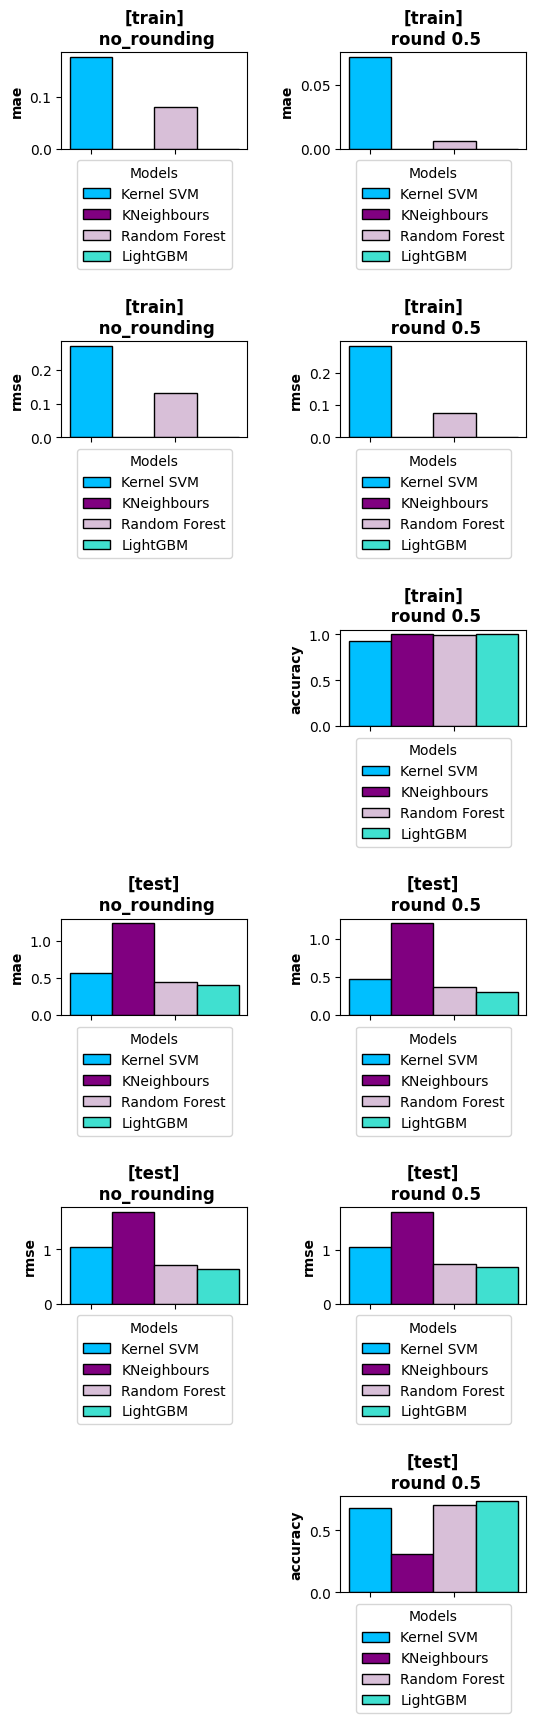

In [15]:
from training.results import plot_results


plot_results(
    results,
    measure_types=["mae", "rmse", "accuracy"],
    figsize=(6, 20),
    sets=[
        "train",
        "test",
    ],
    rounding_types=["no_rounding", "round 0.5", "best"],
    hspace=2,
    wspace=0.5,
)

In [16]:
from training.train_and_evaluate_models import print_results

for model_name, model in results.items():
    print_results(model_name, model)

==== kernel_svm ====
	--> no_rounding
		--> train
			--> rmse: 0.2709546148033673
			--> mae: 0.17606718192161624
		--> test
			--> rmse: 1.0359407498545896
			--> mae: 0.564048215241779
	--> round 0.5
		--> train
			--> rmse: 0.28450284536598086
			--> mae: 0.07211184694628403
			--> accuracy: 0.9315673289183223
		--> test
			--> rmse: 1.0641207361838554
			--> mae: 0.47058823529411764
			--> accuracy: 0.6801470588235294

==== knn ====
	--> no_rounding
		--> train
			--> rmse: 0.0
			--> mae: 0.0
		--> test
			--> rmse: 1.6856974326889738
			--> mae: 1.2415187239679515
	--> round 0.5
		--> train
			--> rmse: 0.0
			--> mae: 0.0
			--> accuracy: 1.0
		--> test
			--> rmse: 1.7160573828332404
			--> mae: 1.2095588235294117
			--> accuracy: 0.3088235294117647

==== random_forest ====
	--> no_rounding
		--> train
			--> rmse: 0.13065726190419047
			--> mae: 0.08033701250919788
		--> test
			--> rmse: 0.712830903552044
			--> mae: 0.45099264705882347
	--> round 0.5
		--> train
			--> rmse:

In [ ]:
results = train_and_evaluate_models(
    [
        "kernel_svm",
        "knn",
        "random_forest",
        "lightgbm",
    ],
    X_train,
    y_train,
    X_test,
    y_test,
    thresholds=[0.05 for i in range(5, 16)],
)